In [53]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import seaborn as sns

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

from sklearn.linear_model import LinearRegression as lm
import statsmodels.api as sm

In [54]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return (diff)

In [55]:
def runMyAR1(yin):
    tlen = len(yin)
    y = np.array(yin[2:tlen])
    x = np.array(yin[1:(tlen-1)])
    X = x
    X = sm.add_constant(X)
    regr2 = sm.OLS(y,X)
    model = regr2.fit()
    print(model.summary())
    ypred = model.predict()
    plt.plot((y-ypred))

In [56]:
# Create large images!
register_matplotlib_converters()
sns.set_style("darkgrid")
plt.rc("figure", figsize=(14, 8)) # was 16,12
plt.rc("font", size=13)

In [57]:
dfo = pd.read_csv("Ren Gen TX.csv")
#dfo.columns = ['year','Renewable energy production']
dfo.head()

,Unnamed: 0,"Renewable energy production, Texas (Billion Btu)"
0,1960,50155
1,1961,52023
2,1962,47721
3,1963,42718
4,1964,43884


In [58]:
dfo.rename(columns={"Unnamed: 0":"Year","Renewable energy production, Texas (Billion Btu)":"REP"},inplace=True)

In [59]:
dfo.head()

,Year,REP
0,1960,50155
1,1961,52023
2,1962,47721
3,1963,42718
4,1964,43884


In [60]:
df = dfo['REP']
print(len(df))

59


<AxesSubplot:>

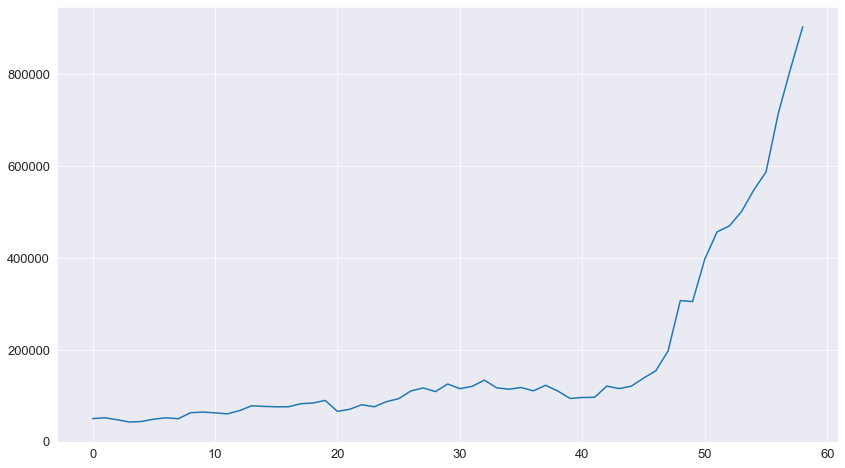

In [61]:
df.plot()

In [62]:
#import chart_studio.plotly as py
import plotly.graph_objs as go
# Offline mode
import plotly.io as pio
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)

In [63]:
#pltobj = go.Scatter(y=dfo['Price'], x=dfo['Month'])
pltobj = go.Scatter(y=dfo['REP'])

In [64]:
fig = go.Figure(data=pltobj)
pio.show(fig)

In [65]:
sm.tsa.stattools.adfuller(df)

(8.214153484160688,
 1.0,
 0,
 58,
 {'1%': -3.548493559596539,
  '5%': -2.912836594776334,
  '10%': -2.594129155766944},
 1082.551150310405)

In [66]:
sm.tsa.stattools.kpss(df)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




(0.8207884424227161,
 0.01,
 4,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

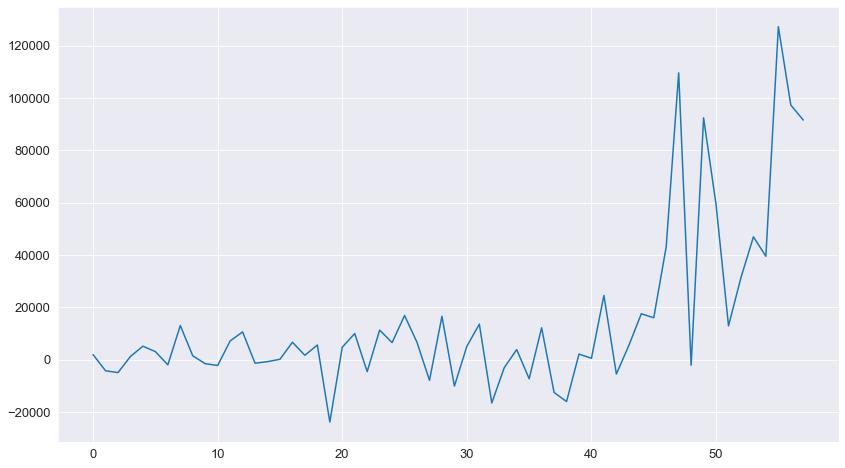

In [67]:
# detrend, if required, and plot
dtrend = difference(np.array(df),1)
#dtrend = df
plt.plot(dtrend)

In [68]:
sm.tsa.stattools.adfuller(dtrend)

(-1.5044854186074923,
 0.5312913110054411,
 11,
 46,
 {'1%': -3.5812576580093696,
  '5%': -2.9267849124681518,
  '10%': -2.6015409829867675},
 1060.9291971278926)

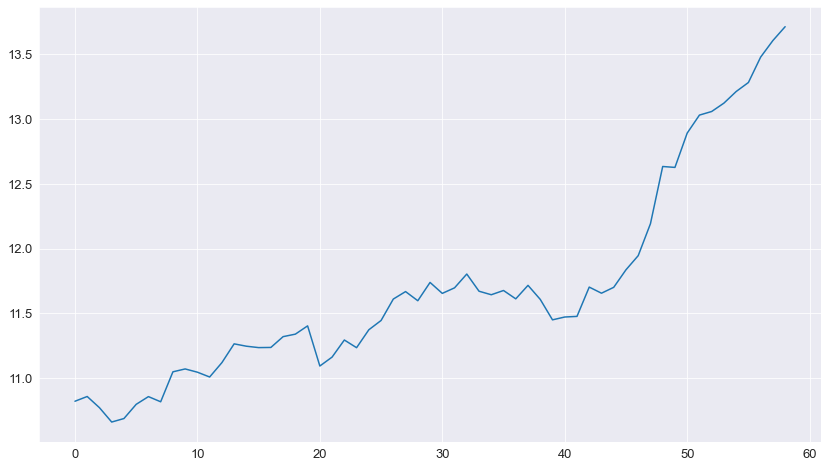

In [69]:
# Since we see steady increase in variation, lets do a log transformation
dflog = np.log(df)
plt.plot(dflog)

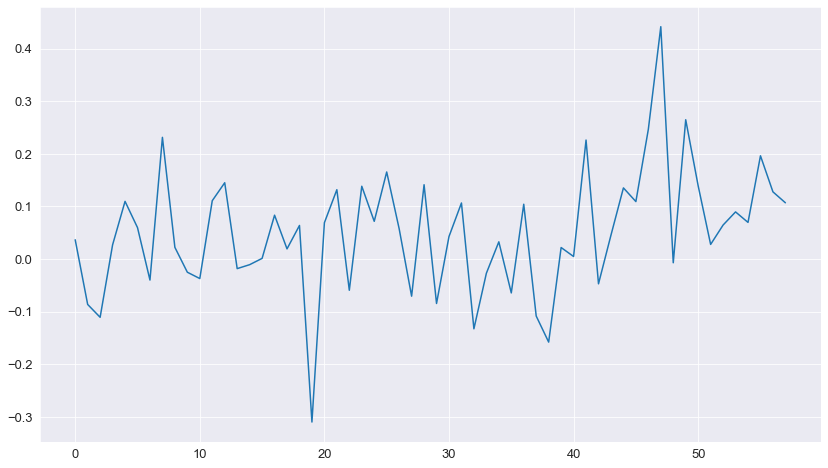

In [70]:
dflog_dtrend = difference(dflog,1)
plt.plot(dflog_dtrend)

In [71]:
sm.tsa.stattools.adfuller(dflog_dtrend)

(-3.0496739454382644,
 0.030508735715244165,
 2,
 55,
 {'1%': -3.5552728880540942,
  '5%': -2.9157312396694217,
  '10%': -2.5956695041322315},
 -59.076185968900276)

In [72]:
from statsmodels.tsa.seasonal import STL

In [73]:
stl = STL(dflog, period=12)
#stl = STL(df)

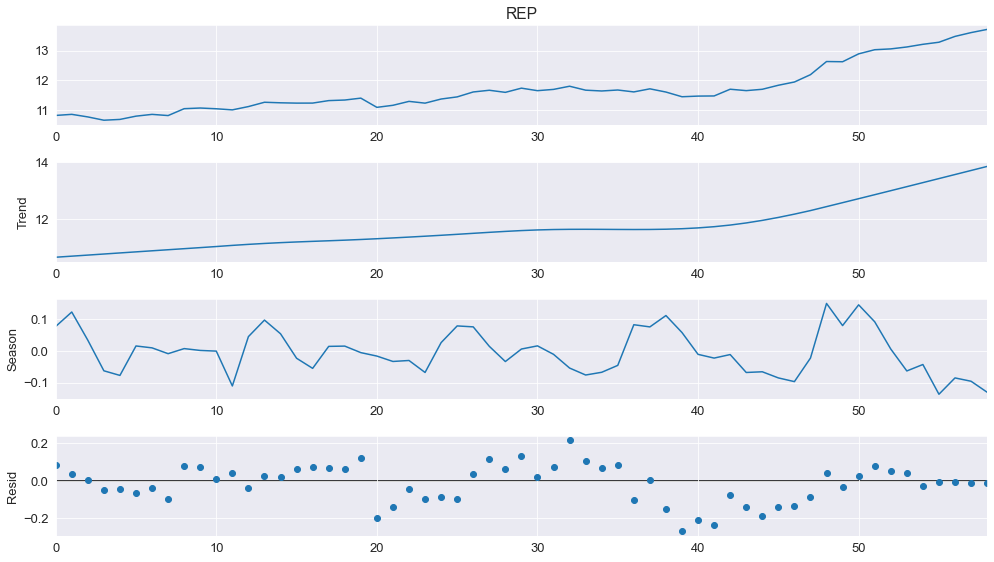

In [74]:
res = stl.fit()
fig = res.plot()

# ARIMA MODEL

In [75]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



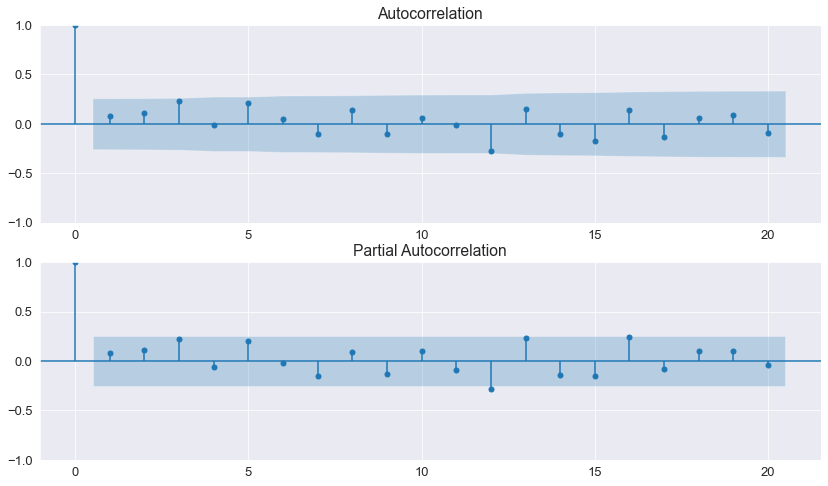

In [76]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dflog_dtrend, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dflog_dtrend, lags=20, ax=ax2)

In [77]:
sm.tsa.stattools.arma_order_select_ic(dflog_dtrend)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



{'bic':            0          1          2
 0 -75.422557 -71.698457 -68.156855
 1 -71.761970 -69.548485 -66.260701
 2 -68.384237 -66.042925 -61.954252
 3 -67.307712 -63.779606 -59.042672
 4 -63.345444 -59.728980 -55.964778,
 'bic_min_order': (0, 0)}

In [78]:
from statsmodels.tsa.arima.model import ARIMA

In [93]:
my_model = sm.tsa.arima.ARIMA(dflog,order=(1,1,1),seasonal_order=(1,1,1,12))
my_model_res = my_model.fit()
print(my_model_res.summary())

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



                                    SARIMAX Results                                     
Dep. Variable:                              REP   No. Observations:                   59
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  25.518
Date:                          Tue, 14 Feb 2023   AIC                            -41.036
Time:                                  19:54:13   BIC                            -31.893
Sample:                                       0   HQIC                           -37.611
                                           - 59                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9933      0.162      6.125      0.000       0.675       1.311
ma.L1         -0.8513      0.203     -4.203      0.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [94]:
type(my_model_res)

statsmodels.tsa.arima.model.ARIMAResultsWrapper

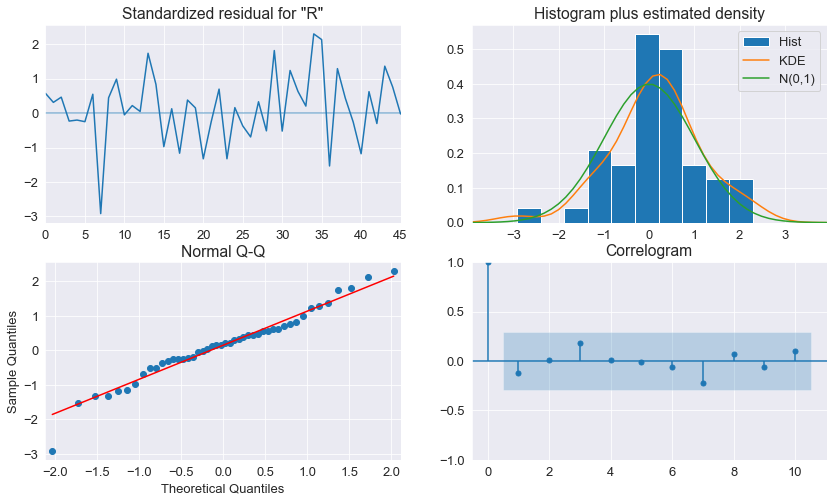

In [95]:
pred = my_model_res.plot_diagnostics()

In [96]:
tforecast =  my_model_res.forecast(48)
tforecast2 = my_model_res.get_forecast(48)
confint = np.array(tforecast2.conf_int())

In [97]:
type(confint)

numpy.ndarray

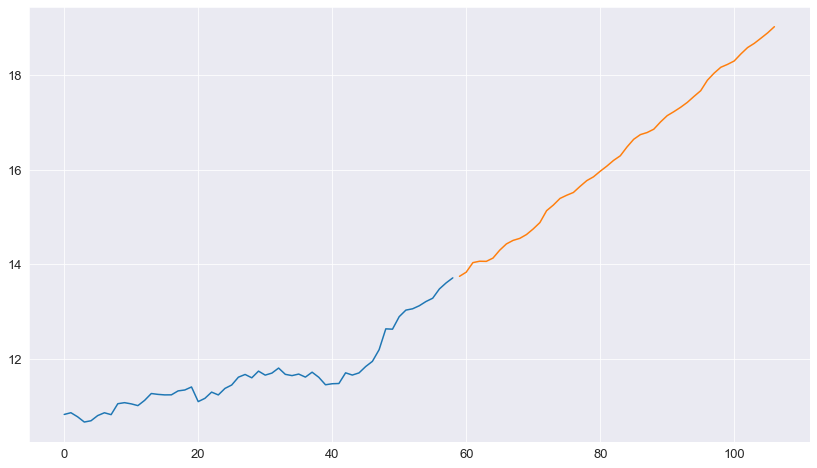

In [98]:
plt.plot(dflog)
plt.plot(tforecast)

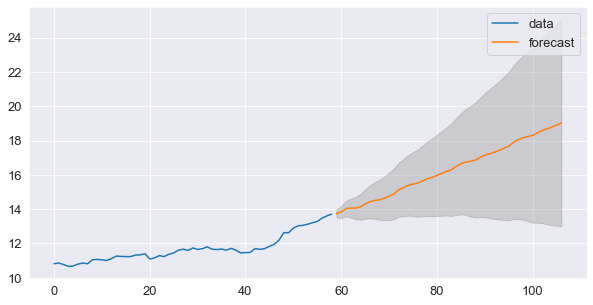

In [99]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(dflog.index, dflog, label='data')
ax.plot(tforecast2.predicted_mean.index, tforecast2.predicted_mean, label='forecast')
ax.fill_between(tforecast2.predicted_mean.index, confint[:,0], confint[:,1],color='gray',alpha=0.3)
ax.legend()

# AUTO ARIMA - MODEL

In [91]:
import pmdarima as pm

In [92]:
myfit = pm.auto_arima(dflog,start_p=0, start_q=0,
                             max_p=4, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-20.219, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-36.814, Time=0.32 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.82 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-18.294, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-38.243, Time=1.42 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=-36.622, Time=3.52 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=-38.611, Time=0.90 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=-36.622, Time=2.06 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=-38.371, Time=1.47 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=-34.625, Time=2.20 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-40.066, Time=0.37 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-38.527, Time=0.20 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=-3

# WINTER-HOLTS MODEL

In [102]:
rolling = dfo['REP'].rolling(20)
type(rolling)

pandas.core.window.rolling.Rolling

<AxesSubplot:>

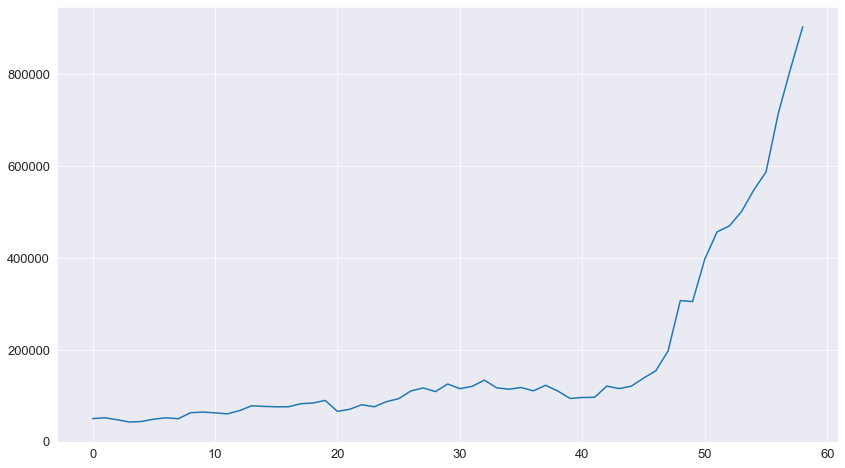

In [103]:
df.plot()

In [113]:
rolling = dfo['REP'].rolling(2)
type(rolling)

pandas.core.window.rolling.Rolling

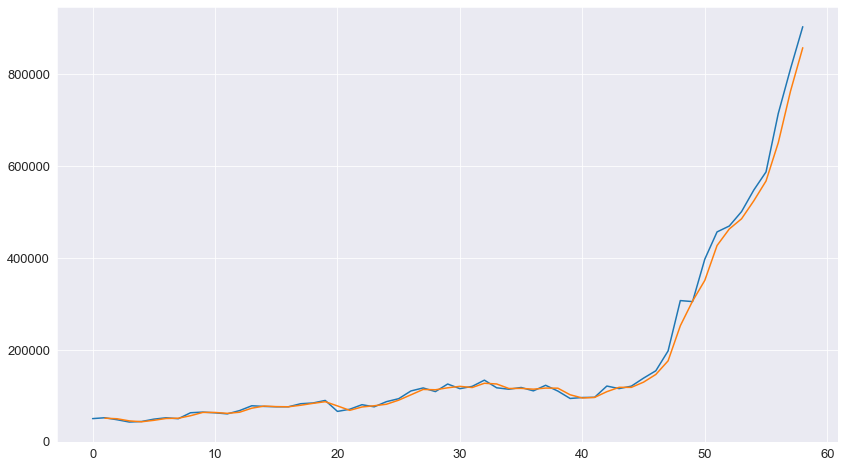

In [114]:
mav = rolling.mean()
plt.plot(dfo['REP'])
plt.plot(mav)

In [115]:
type(mav)

pandas.core.series.Series

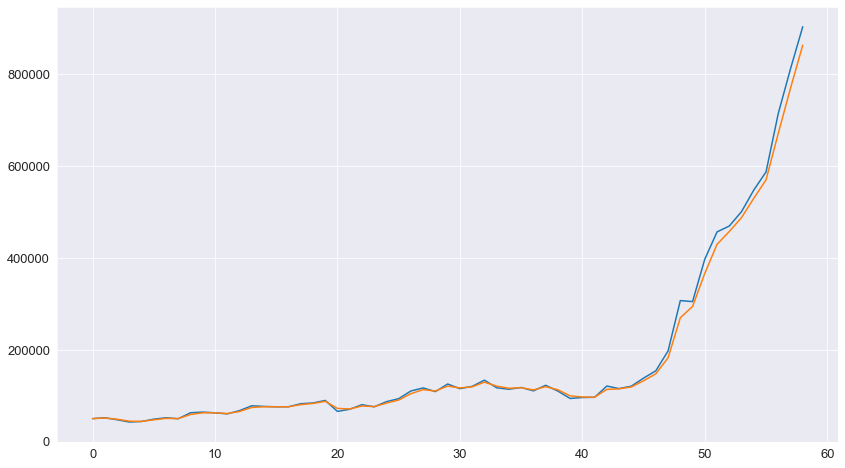

In [119]:
# Try out the following with various values of 'alpha' and evaluate the results
ewma = dfo['REP'].ewm(alpha=0.7, adjust=False).mean()
plt.plot(dfo['REP'])
plt.plot(ewma)

In [169]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [170]:
ses = SimpleExpSmoothing(df)

In [171]:
type(ses)

statsmodels.tsa.holtwinters.model.SimpleExpSmoothing

In [172]:
result = ses.fit(smoothing_level=0.1, optimized=False)

In [173]:
result.summary()

Dep. Variable:,REP,No. Observations:,59
Model:,SimpleExpSmoothing,SSE,1133099166623.606
Optimized:,False,AIC,1401.028
Trend:,None,BIC,1405.183
Seasonal:,None,AICC,1401.769
Seasonal Periods:,None,Date:,"Tue, 14 Feb 2023"
Box-Cox:,False,Time:,20:15:40
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1000000,alpha,False
initial_level,50155.000,l.0,False


In [174]:
mypred = result.predict(start=1, end=160)

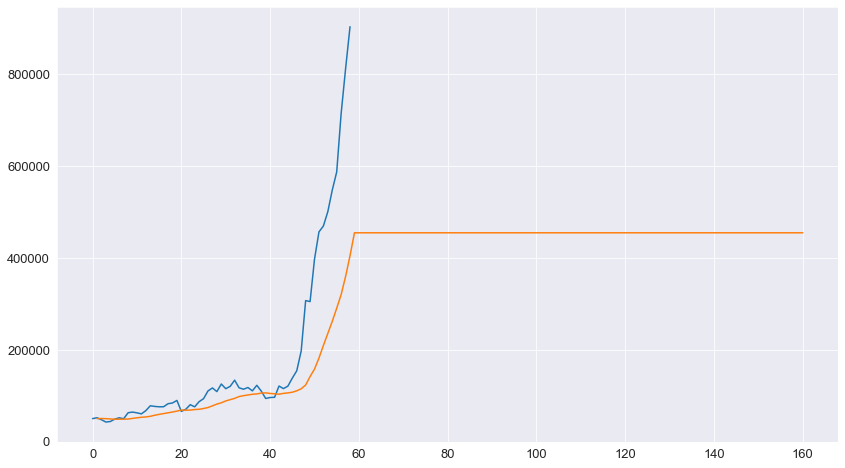

In [175]:
plt.plot(df)
plt.plot(mypred)

In [176]:
result.params

{'smoothing_level': 0.1,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 50155.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

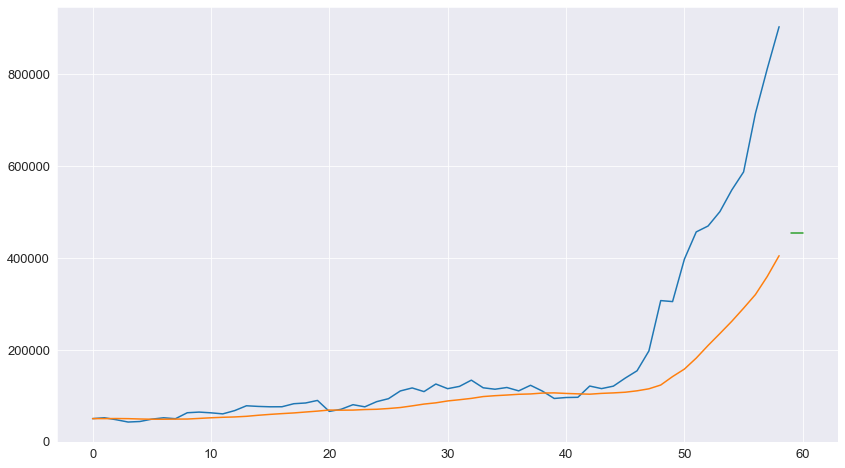

In [177]:
plt.plot(df)
plt.plot(result.fittedvalues)
plt.plot(result.forecast(2))

In [178]:
result2 = ses.fit() # optimize the values of alpha

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



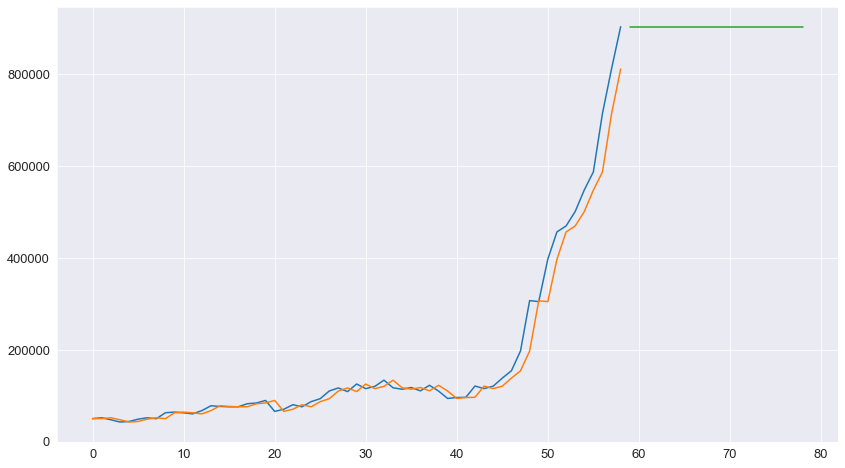

In [179]:
plt.plot(df)
plt.plot(result2.fittedvalues)
plt.plot(result2.forecast(20))

In [180]:
result2.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 50155.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [181]:
from statsmodels.tsa.holtwinters import Holt

In [182]:
model = Holt(df, exponential=True)
result = model.fit()
result.params

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



{'smoothing_level': 0.9478571428571428,
 'smoothing_trend': 0.11559233449477352,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 50155.0,
 'initial_trend': 1.0372445419200478,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [183]:
result.summary()

Dep. Variable:,REP,No. Observations:,59
Model:,Holt,SSE,28120080916.330
Optimized:,True,AIC,1186.951
Trend:,Multiplicative,BIC,1195.261
Seasonal:,None,AICC,1188.566
Seasonal Periods:,None,Date:,"Tue, 14 Feb 2023"
Box-Cox:,False,Time:,20:16:04
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9478571,alpha,True
smoothing_trend,0.1155923,beta,True


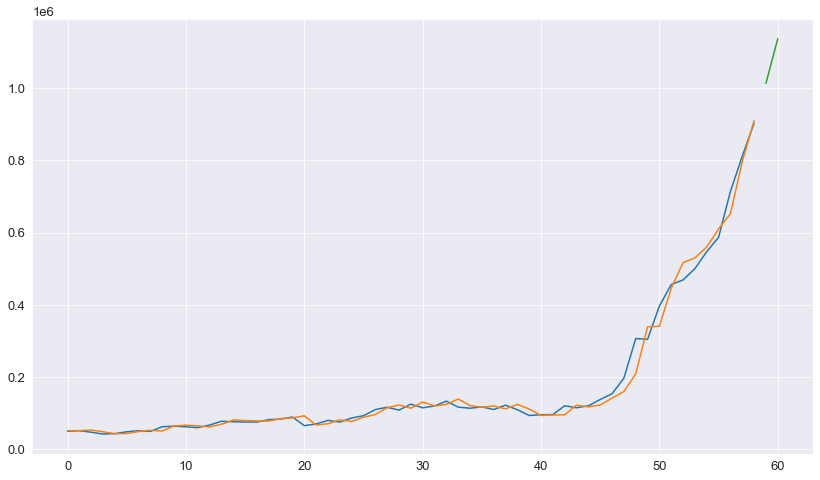

In [184]:
plt.plot(df)
plt.plot(result.fittedvalues)
plt.plot(result.forecast(2))

In [185]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [186]:
model = ExponentialSmoothing(df, trend='mul', seasonal='mul', seasonal_periods=12)

In [187]:
result3 = model.fit()
result3.params

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



{'smoothing_level': 0.9242857142857143,
 'smoothing_trend': 0.1026984126984127,
 'smoothing_seasonal': 0.07571428571428573,
 'damping_trend': nan,
 'initial_level': 51163.31666666666,
 'initial_trend': 1.0475739616828332,
 'initial_seasons': array([0.97107962, 1.05686224, 1.04917597, 0.99872373, 0.95822798,
        1.01088147, 1.02549094, 1.02765088, 1.01764936, 0.97396842,
        0.97367414, 0.93661526]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

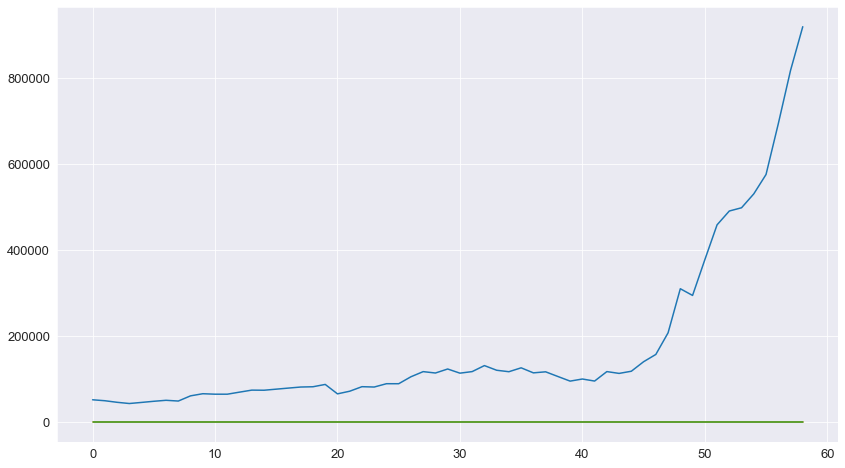

In [188]:
plt.plot(result3.level)
plt.plot(result3.trend)
plt.plot(result3.season)

In [189]:
result3.summary()

Dep. Variable:,REP,No. Observations:,59
Model:,ExponentialSmoothing,SSE,34776724113.134
Optimized:,True,AIC,1223.486
Trend:,Multiplicative,BIC,1256.727
Seasonal:,Multiplicative,AICC,1240.586
Seasonal Periods:,12,Date:,"Tue, 14 Feb 2023"
Box-Cox:,False,Time:,20:16:16
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9242857,alpha,True
smoothing_trend,0.1026984,beta,True


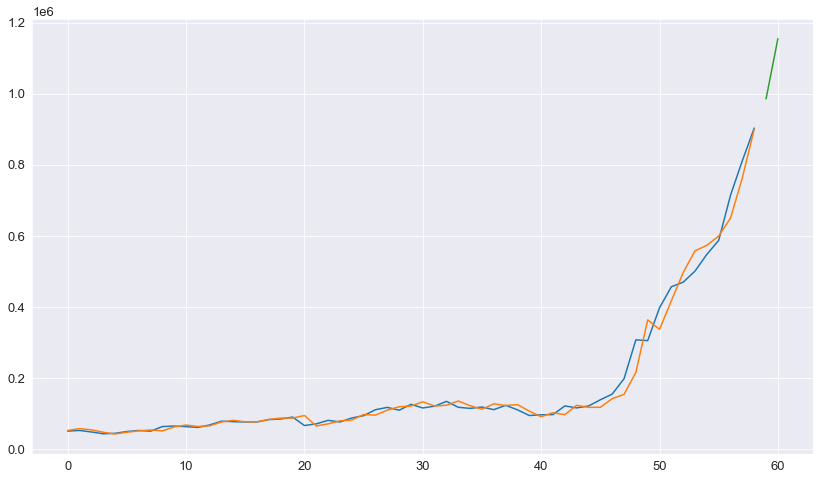

In [190]:
plt.plot(df)
plt.plot(result3.fittedvalues)
plt.plot(result3.forecast(2))

In [191]:
model2 = ExponentialSmoothing(df, trend='add', seasonal='mul', seasonal_periods=12)

In [192]:
result4 = model2.fit()
result4.params

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



{'smoothing_level': 0.9242857142857143,
 'smoothing_trend': 0.37656084656084654,
 'smoothing_seasonal': 0.07571428571428573,
 'damping_trend': nan,
 'initial_level': 51163.31666666666,
 'initial_trend': 2434.041666666668,
 'initial_seasons': array([0.97107962, 1.05686224, 1.04917597, 0.99872373, 0.95822798,
        1.01088147, 1.02549094, 1.02765088, 1.01764936, 0.97396842,
        0.97367414, 0.93661526]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [193]:
result4.summary()

Dep. Variable:,REP,No. Observations:,59
Model:,ExponentialSmoothing,SSE,38556273797.311
Optimized:,True,AIC,1229.573
Trend:,Additive,BIC,1262.814
Seasonal:,Multiplicative,AICC,1246.673
Seasonal Periods:,12,Date:,"Tue, 14 Feb 2023"
Box-Cox:,False,Time:,20:16:30
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9242857,alpha,True
smoothing_trend,0.3765608,beta,True


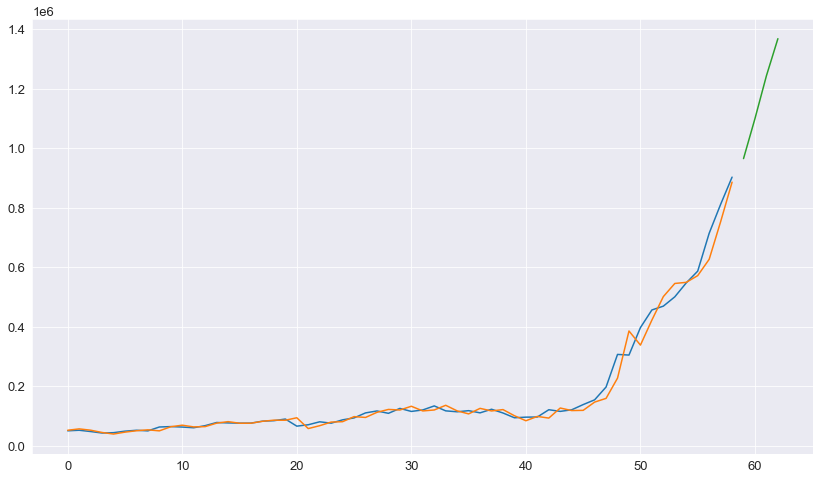

In [194]:
plt.plot(df)
plt.plot(result4.fittedvalues)
plt.plot(result4.forecast(4))